In [1]:
from sklearn.datasets import fetch_kddcup99
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(2022273+2022482)

dataset = fetch_kddcup99()
data = np.array(dataset.data)

n, d = data.shape

print(f"n, d: {n, d}")

n, d: (494021, 41)


In [2]:
le = LabelEncoder()
data[:, 1] = le.fit_transform(data[:, 1])
data[:, 2] = le.fit_transform(data[:, 2])
data[:, 3] = le.fit_transform(data[:, 3])

In [3]:
loss = []
graph_labels = []

kmeans_D = KMeans(n_clusters=15, random_state=42)
kmeans_D.fit(data)

loss.append(kmeans_D.inertia_)
graph_labels.append("D_loss")

In [4]:
for iter in range(5):
    M = np.random.normal(0, 1/20, (d, 20))
    E = np.dot(data, M)

    kmeans_E = KMeans(n_clusters=15, random_state=42)
    kmeans_E.fit(E)
    loss.append(kmeans_E.inertia_)
    graph_labels.append(f"E_loss{iter+1}")

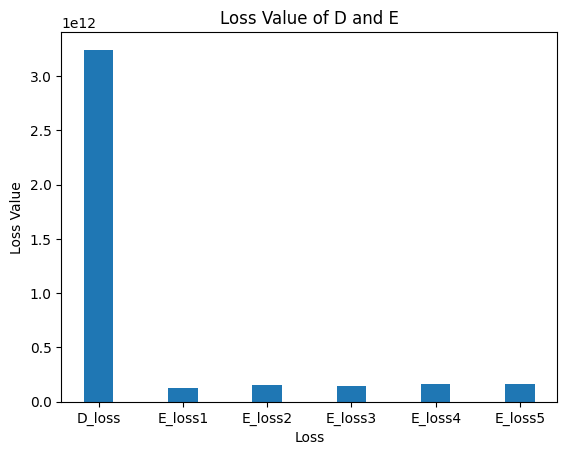

In [5]:
fig, ax = plt.subplots()
bar_width = 0.35

ax.bar(graph_labels, loss, bar_width)
ax.set_xlabel("Loss")
ax.set_ylabel("Loss Value")
ax.set_title("Loss Value of D and E")
plt.show()

In [6]:
loss

[3244311308432.4795,
 124091136058.02016,
 154484520599.05118,
 139732065530.1511,
 166468970845.66122,
 159947934773.04117]

In [7]:
y = dataset.target

target_le = LabelEncoder()
y = target_le.fit_transform(y)

In [8]:
def sparse_jl_matrix(rows, cols):
    sparsity = 1/3
    val = np.sqrt(1 / (sparsity * rows))
    mat = np.random.choice([val, -val, 0], size = (rows, cols), p=[sparsity/2, sparsity/2, 1-sparsity])
    return mat

In [9]:
loss = []
graph_labels = []

lr_D = LinearRegression(n_jobs=-1)
lr_D.fit(data, y)

loss.append(mean_squared_error(y, lr_D.predict(data)))
graph_labels.append("D_loss")

In [10]:
for iter in range(5):
    M = sparse_jl_matrix(10*d, n)
    E = np.dot(M, data)
    z = np.dot(M, y)

    lr_E = LinearRegression(n_jobs=-1)
    lr_E.fit(E, z)

    loss.append(mean_squared_error(y, lr_E.predict(data)))

    print(f"Loss of {iter} iteration: {loss[-1]}")
    graph_labels.append(f"E_loss{iter+1}")

Loss of 0 iteration: 6.859092328881431
Loss of 1 iteration: 3.2982698145385596
Loss of 2 iteration: 1.0246018287059169
Loss of 3 iteration: 1.1060038306219648
Loss of 4 iteration: 3.241389593287925


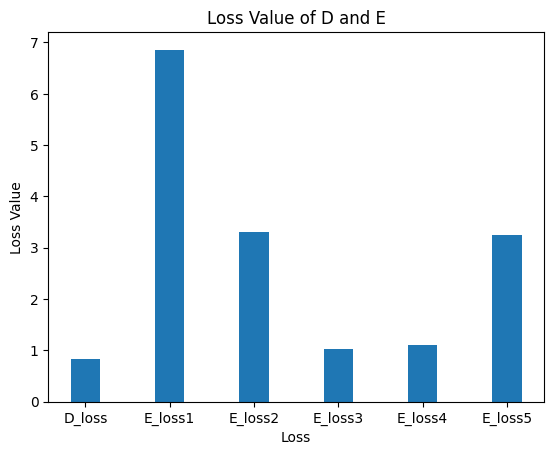

In [11]:
fig, ax = plt.subplots()
bar_width = 0.35

ax.bar(graph_labels, loss, bar_width)
ax.set_xlabel("Loss")
ax.set_ylabel("Loss Value")
ax.set_title("Loss Value of D and E")
plt.show()

In [12]:
loss

[0.8240358245982908,
 6.859092328881431,
 3.2982698145385596,
 1.0246018287059169,
 1.1060038306219648,
 3.241389593287925]